<a href="https://colab.research.google.com/github/Startcode2437/Venezuela-import-export-trade-data/blob/main/DSA8203_CAT_I_GSino_ID_192344.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
from scipy.cluster import hierarchy
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

Data Cleaning and Analysis

# Dataset Information
This dataset is hosted on [GitHub](https://raw.githubusercontent.com/Startcode2437/Venezuela-import-export-trade-data/refs/heads/main/import%20export%20trade%20data%20US.csv).

In [ ]:
#Load Data
dataset_url = "https://raw.githubusercontent.com/Startcode2437/Venezuela-import-export-trade-data/refs/heads/main/import%20export%20trade%20data%20US.csv"

df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())

  ESTIMATE ARRIVAL DATE ACTUAL ARRIVAL DATE  \
0              8-Mar-20           12-Mar-20   
1             11-Mar-20           11-Mar-20   
2             13-Mar-20           15-Mar-20   
3             15-Mar-20           18-Mar-20   
4             16-Mar-20           16-Mar-20   

                                        SHIPPER NAME  \
0                           ANGEL DORRONSORO GANDARA   
1                   SUMITOMO ELECTRIC INDUSTRIES LTD   
2                                    STAHL EUROPE BV   
3  COVERCRAFT INDUSTRIES PAULS VALLEY 100 ENTERPRISE   
4                     LOTTE CHILSUNG BEVERAGE CO LTD   

                                    SHIPPER ADDRESS   \
0  106 CIUDAD INDUSTRIAL AGUASCALIENTES AGS C P 2...   
1  ROUP MANAGEMENT DEPARTMENT STRATEGIC PLANNING ...   
2  PO BOX 31 -5140 AA SLUISWEG 10-5145 PE 5140 WA...   
3              BLVD PAULS VALLEY OK 73075 AUSTRALIA    
4   4TH FLOOR LOTTE CASTLEPLAZA 7-18 SINCHEON-DON...   

                    RAW SHIPPER NAME       

In [ ]:
# Check for missing values
print(df.isnull().sum())

ESTIMATE ARRIVAL DATE               0
ACTUAL ARRIVAL DATE                 0
SHIPPER NAME                        0
SHIPPER ADDRESS                     0
RAW SHIPPER NAME                    0
RAW SHIPPER ADDRESS1                0
RAW SHIPPER ADDRESS2                0
RAW SHIPPER ADDRESS3                0
RAW SHIPPER ADDRESS OTHERS          0
CONSIGNEE NAME                      0
CONSIGNEE ADDRESS                   0
RAW CONSIGNEE NAME                  0
RAW CONSIGNEE ADDR1                 0
RAW CONSIGNEE ADDRESS2              0
RAW CONSIGNEE ADDRESS3              0
RAW CONSIGNEE ADDRESS OTHERS        0
NOTIFY PARTY NAME                   0
NOTIFY PARTY ADDRESS                0
RAW NOTIFY PARTY NAME               0
RAW NOTIFY PARTY ADDRESS1           0
RAW NOTIFY PARTY ADDRESS2           0
RAW NOTIFY PARTY ADDRESS3           0
RAW NOTIFY PARTY ADDRESS OTHERS     0
COUNTRY                             0
HS CODE                             0
PRODUCT DESCRIPTION                 0
QUANTITY    

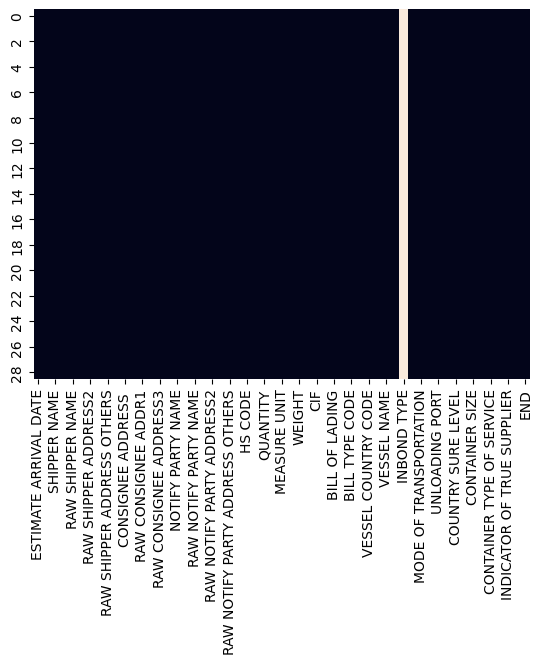

In [ ]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
# Fill missing values with a constant
df['INBOND TYPE'] = df['INBOND TYPE'].fillna(0)

In [ ]:
# Check for missing values
print(df.isnull().sum())

ESTIMATE ARRIVAL DATE              0
ACTUAL ARRIVAL DATE                0
SHIPPER NAME                       0
SHIPPER ADDRESS                    0
RAW SHIPPER NAME                   0
RAW SHIPPER ADDRESS1               0
RAW SHIPPER ADDRESS2               0
RAW SHIPPER ADDRESS3               0
RAW SHIPPER ADDRESS OTHERS         0
CONSIGNEE NAME                     0
CONSIGNEE ADDRESS                  0
RAW CONSIGNEE NAME                 0
RAW CONSIGNEE ADDR1                0
RAW CONSIGNEE ADDRESS2             0
RAW CONSIGNEE ADDRESS3             0
RAW CONSIGNEE ADDRESS OTHERS       0
NOTIFY PARTY NAME                  0
NOTIFY PARTY ADDRESS               0
RAW NOTIFY PARTY NAME              0
RAW NOTIFY PARTY ADDRESS1          0
RAW NOTIFY PARTY ADDRESS2          0
RAW NOTIFY PARTY ADDRESS3          0
RAW NOTIFY PARTY ADDRESS OTHERS    0
COUNTRY                            0
HS CODE                            0
PRODUCT DESCRIPTION                0
QUANTITY                           0
Q

**Question 1**

What cleanup was required in your dataset? Determine how to handle the missing values for your dataset.

**Answer**

The data had missing values in column INBOND TYPE  therefore I had to cleanup the dataset by replacing the missing values with a constant  0.

Raw datasets containing missing values can negatively affect the quality and accuracy of statistical analysis, insights, and machine learning model predictions.

Cleaning like replacing the missing values ensures the data is accurate, consistent and complete thus reducing biases or errors in analysis and skewed results.

In [ ]:
df.columns

Index(['ESTIMATE ARRIVAL DATE', 'ACTUAL ARRIVAL DATE', 'SHIPPER NAME',
       'SHIPPER ADDRESS', 'RAW SHIPPER NAME', 'RAW SHIPPER ADDRESS1',
       'RAW SHIPPER ADDRESS2', 'RAW SHIPPER ADDRESS3',
       'RAW SHIPPER ADDRESS OTHERS', 'CONSIGNEE NAME', 'CONSIGNEE ADDRESS',
       'RAW CONSIGNEE NAME', 'RAW CONSIGNEE ADDR1', 'RAW CONSIGNEE ADDRESS2',
       'RAW CONSIGNEE ADDRESS3', 'RAW CONSIGNEE ADDRESS OTHERS',
       'NOTIFY PARTY NAME', 'NOTIFY PARTY ADDRESS', 'RAW NOTIFY PARTY NAME',
       'RAW NOTIFY PARTY ADDRESS1', 'RAW NOTIFY PARTY ADDRESS2',
       'RAW NOTIFY PARTY ADDRESS3', 'RAW NOTIFY PARTY ADDRESS OTHERS',
       'COUNTRY', 'HS CODE', 'PRODUCT DESCRIPTION', 'QUANTITY',
       'QUANTITY UNIT', 'MEASURE UNIT', 'WEIGHT IN KG', 'WEIGHT',
       'WEIGHT UNIT', 'CIF', 'TEU', 'BILL OF LADING', 'MASTER BILL OF LADING',
       'BILL TYPE CODE', 'CARRIER SASC CODE', 'VESSEL COUNTRY CODE',
       'VESSEL CODE', 'VESSEL NAME', 'VOYAGE', 'INBOND TYPE', 'MANIFEST NO',
       'MODE OF T

<Figure size 1500x800 with 0 Axes>

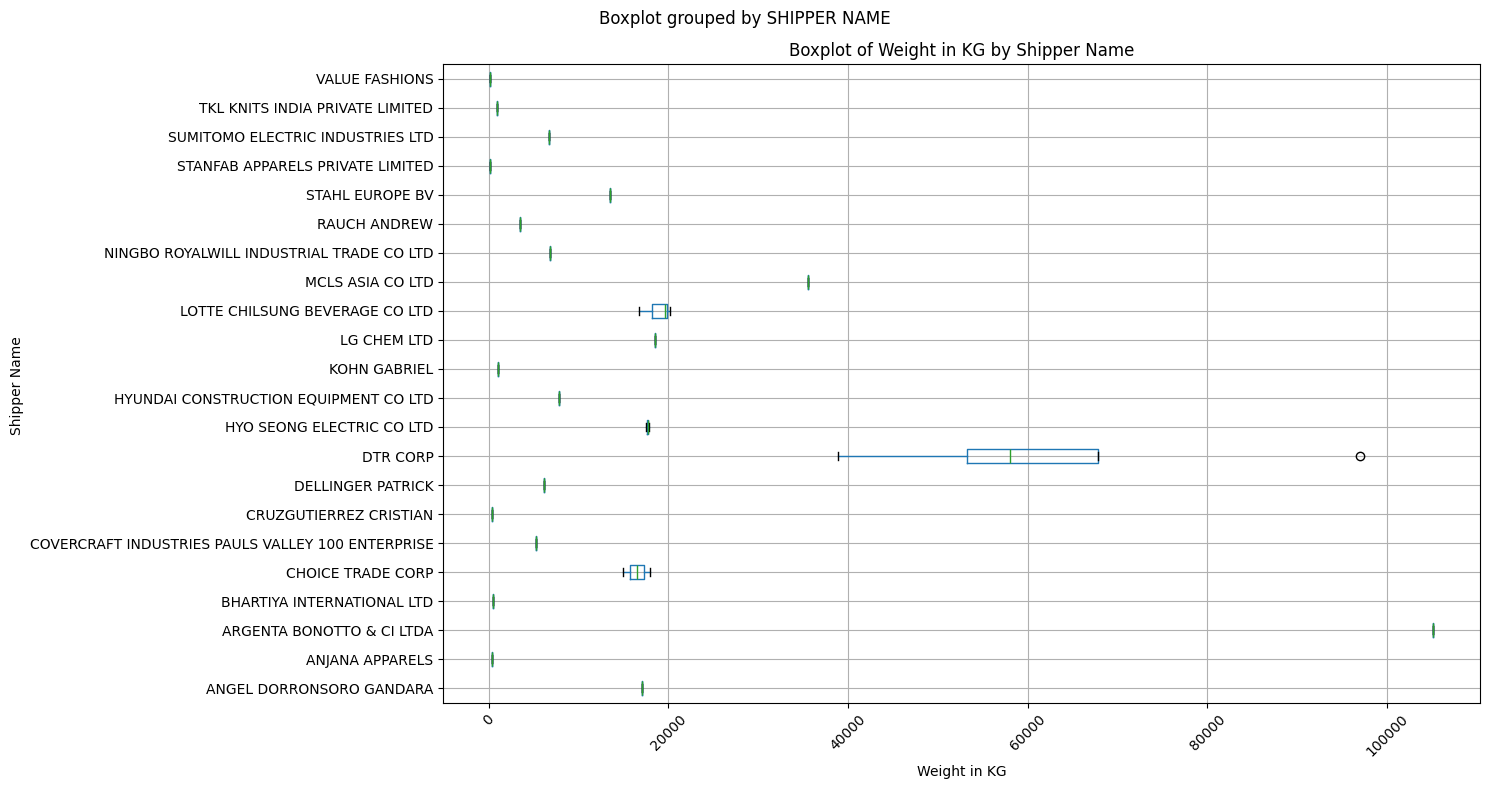

In [ ]:
# Plot a boxplot
df.columns = df.columns.str.strip()
plt.figure(figsize=(15, 8))
df.boxplot(column='WEIGHT IN KG', by='SHIPPER NAME',vert=False, figsize=(15, 8))
plt.title('Boxplot of Weight in KG by Shipper Name')
plt.ylabel('Shipper Name ')
plt.xlabel('Weight in KG')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

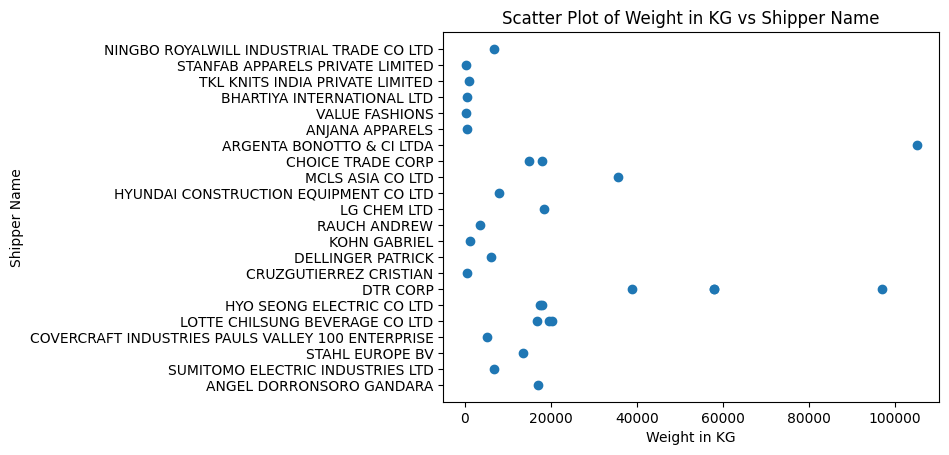

In [ ]:
# Scatter Plot
plt.scatter(df['WEIGHT IN KG'], df['SHIPPER NAME'])
plt.title('Scatter Plot of Weight in KG vs Shipper Name')
plt.xlabel('Weight in KG')
plt.ylabel('Shipper Name')
plt.show()

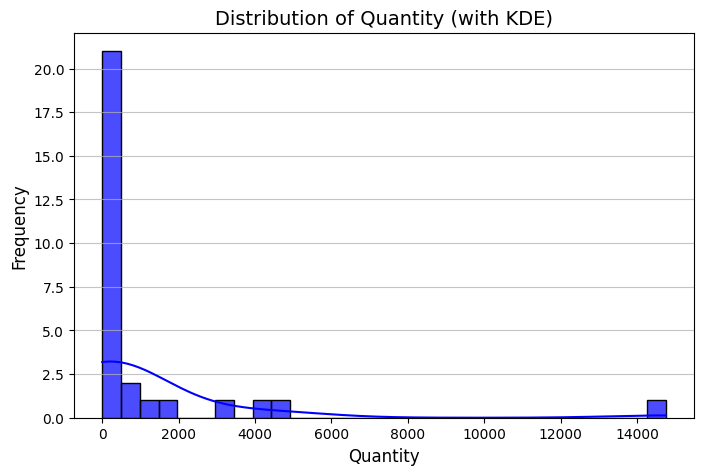

In [ ]:
# Histogram of 'QUANTITY'
plt.figure(figsize=(8, 5))
sns.histplot(df['QUANTITY'],kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Quantity (with KDE)', fontsize=14)
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

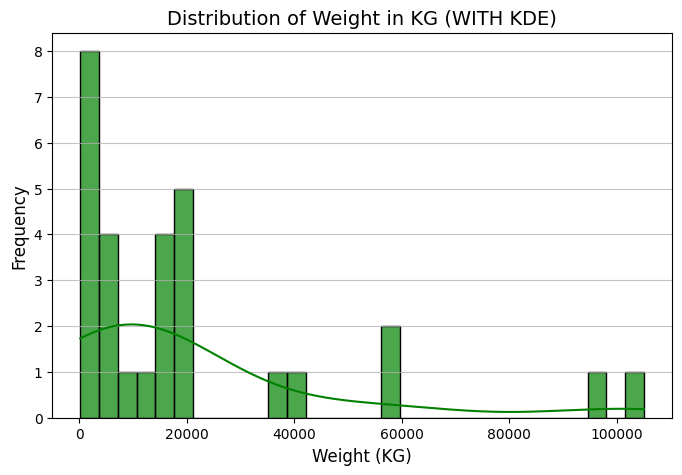

In [ ]:
# Histogram of WEIGHT IN KG
plt.figure(figsize=(8, 5))
sns.histplot(df['WEIGHT IN KG'], kde=True, bins=30, color='green', alpha=0.7)
plt.title('Distribution of Weight in KG (WITH KDE)', fontsize=14)
plt.xlabel('Weight (KG)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

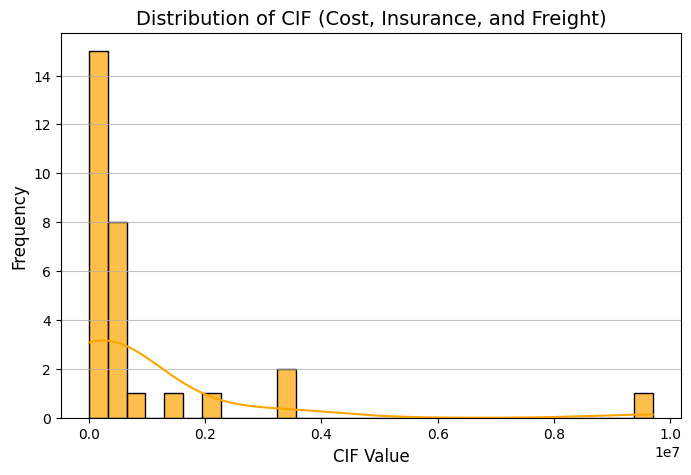

In [ ]:
# Histogram of CIF
plt.figure(figsize=(8, 5))
sns.histplot(df['CIF'],kde=True, bins=30, color='orange', alpha=0.7)
plt.title('Distribution of CIF (Cost, Insurance, and Freight)', fontsize=14)
plt.xlabel('CIF Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

**Question 2**

**Look at some of the histograms for your data? How would you explain one of them to someone who is not familiar with your data?**

**Answer**    
###### The Quantity histogram shows the distribution of trade quantities in the dataset.  
###### The x-axis represents different quantities of goods shipped, and the y-axis shows how many times each quantity appears in the data.
###### The taller the bar, the more frequently that particular quantity of goods was traded.
###### The smooth line overlaid on the bars (kernel density estimate) helps to visualize the overall shape of the distribution.
###### The histogram shows a right-skewed distribution (also called positively skewed).

**Skewness Observation:**

##### Most of the trade quantities are concentrated at the lower end of the x-axis (closer to 0).
##### The frequency of higher trade quantities decreases significantly, resulting in a long tail to the right.

**Interpretation:**

#### **Majority of Trades**: The majority of trades involve small quantities, as indicated by the tall bar near the lower quantity range.
#### **Rare Large Trades**: There are a few trades with much higher quantities, but they occur very infrequently. These are represented by the sparse bars and the tail stretching towards higher values.

Calculating correlation matrix to get a relationship

In [ ]:
# Ensure numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values
numeric_df = numeric_df.fillna(0)

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Find relationships exceeding a certain threshold (e.g., 0.7 for strong positive correlation)
# This keeps only correlations with an absolute value greater than the specified threshold (e.g., 0.7).
# Other correlations are set to NaN in the resulting strong_correlations DataFrame.

threshold = 0.7
strong_correlations = correlation_matrix[abs(correlation_matrix) > threshold]

# Print or visualize the strong correlations
print("Strong Correlations (above", threshold, "):")
print(strong_correlations)


Strong Correlations (above 0.7 ):
                        HS CODE  QUANTITY  WEIGHT IN KG    WEIGHT       CIF  \
HS CODE                     1.0       NaN           NaN       NaN       NaN   
QUANTITY                    NaN       1.0           NaN       NaN       NaN   
WEIGHT IN KG                NaN       NaN      1.000000  0.893720  0.807910   
WEIGHT                      NaN       NaN      0.893720  1.000000       NaN   
CIF                         NaN       NaN      0.807910       NaN  1.000000   
TEU                         NaN       NaN      0.971112  0.809292  0.884594   
VESSEL CODE                 NaN       NaN           NaN       NaN       NaN   
INBOND TYPE                 NaN       NaN           NaN       NaN       NaN   
MANIFEST NO                 NaN       NaN           NaN       NaN       NaN   
MODE OF TRANSPORTATION      NaN       NaN           NaN       NaN       NaN   
COUNTRY SURE LEVEL          NaN       NaN           NaN       NaN       NaN   
HS CODE SURE LEVEL

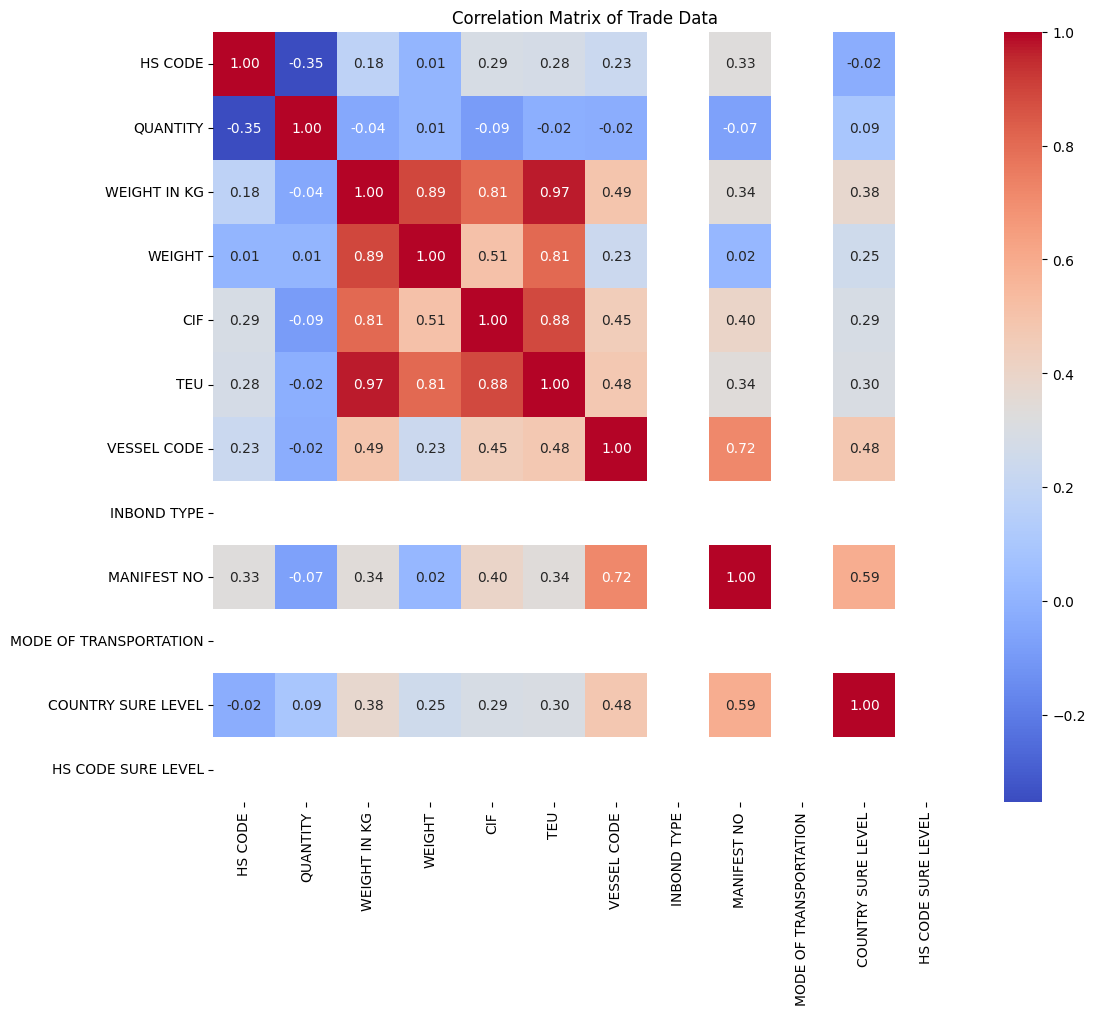

In [ ]:
# Visualization using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Trade Data')
plt.show()

#### **Understanding the Correlation Matrix**

###### A correlation matrix displays the pairwise correlation coefficients (e.g., Pearson) between numeric columns in a dataset.
###### The values range from -1 to 1:
######1: Perfect positive correlation (as one increases, the other increases).
######-1: Perfect negative correlation (as one increases, the other decreases).
######0: No correlation.

######**Interpretation of the Correlation Matrix:**
###### **Strong Correlations Above 0.7:**

######WEIGHT IN KG ↔ TEU (0.971): Suggests a strong relationship between weight in kilograms and TEU (Twenty-foot Equivalent Unit), which makes sense as TEU is a shipping measurement tied to cargo weight.
######WEIGHT IN KG ↔ CIF (0.808): Indicates that weight correlates strongly with the Cost, Insurance, and Freight (CIF), which aligns with freight charges being proportional to cargo weight.
######CIF ↔ TEU (0.885): Reinforces the connection between shipping cost and the size/weight of the cargo.
######VESSEL CODE ↔ MANIFEST NO (0.717): Suggests a linkage, possibly because manifests are tied to specific vessels.

**Question 3**

  Is there a relationship between two columns of your data that you didn't expect? How would you explain it?

 **Answer**

 ###### I didn't expect a relationsip between VESSEL CODE and MANIFEST NO i.e (0.717).

 ###### **Explanation**
 The correlation suggests a linkage, possibly because manifests are tied to specific vessels.

 **VESSEL CODE:** A VESSEL CODE is an identifier that uniquely represents a specific ship or vessel within a shipping company or across a shipping network and it helps in tracking vessels in shipping operations, including cargo transport.e.g Each cargo ship in a shipping fleet might have a unique code (e.g., V12345), assigned for the purposes of logistics management.

**MANIFEST NO:** A MANIFEST NO refers to the unique identification number associated with a shipment's manifest.A manifest is a document that lists all the cargo (goods, containers, etc.) being transported on a particular vessel. It details the ship's cargo, such as the items, weight, consignee, and origin.e.g A manifest might contain multiple entries, one for each shipping container. Each entry is assigned a unique manifest number (e.g., MNF12345).

**How VESSEL CODE and MANIFEST NO are Linked**:
**Operational Connection:**

**In shipping logistics,** a VESSEL CODE identifies the specific ship carrying the cargo while a MANIFEST NO identifies the full cargo list for a particular voyage on that vessel.

Since each manifest is associated with a particular ship, the vessel code will naturally appear frequently in connection with the same manifest number. Hence, each manifest number will often be linked with a specific vessel.

**Business Logic:**

If a specific VESSEL CODE (a ship) is carrying cargo on a certain voyage, it will have a corresponding MANIFEST NO for the list of cargo on board thus there is an inherent relationship between them.

If a shipping company has multiple vessels but each vessel has its own manifest for every trip, a VESSEL CODE can be expected to correlate with MANIFEST NO because a specific manifest typically belongs to a particular vessel's journey.

**Why there is a correlation**

**Direct Relationship:** The VESSEL CODE is directly tied to the MANIFEST NO because the manifest describes the cargo of that specific vessel. Each vessel carries its own manifest, and so there is often a direct one-to-one or many-to-one relationship between the vessel and the manifest.

**Operational Workflow:** Shipping companies often track cargo based on the vessel code, which then points to the specific manifests (shipment details) related to that vessel. Thus, the correlation (0.717) represents a typical, albeit not perfect, relationship.


**Explaining the Correlation Value:**
A correlation of 0.717 suggests a moderately strong relationship between the VESSEL CODE and MANIFEST NO. While they are related (as one vessel carries one or more manifests), the strength could be due to the way data is recorded. This might indicate that the same vessel could be carrying multiple manifests across different journeys, and the data entries for manifests are somewhat dependent on the vessel’s schedule and routes.

**Question 4**

Consider who would be interested in your dataset. Identify at least three organizations or individuals that would be interested in your insights. Why?

**Answer**

Potential Users of Insights
1. **Shipping Companies:**
To optimize freight pricing models.
To streamline vessel allocation based on cargo weight and TEU.
2. **Trade Analysts**:
To analyze cost components (e.g., CIF) and their determinants.
To identify inefficiencies or patterns in logistics.
3. **Government Agencies:**
To monitor import/export trends and ensure fair trade practices.
To evaluate whether cargo standards align with international shipping norms.
4. **Multinational Agribusiness Firms**
Companies like Cargill or Olam International could use trade data to identify supply chain opportunities involving Kenyan agricultural products in Latin American markets like Venezuela to leverage bilateral trade gaps for cross-continental market expansion.
5. **Kenyan Export Promotion Agencies**
Kenya Export Promotion and Branding Agency (KEPROBA), Kenya Association of Manufacturers (KAM) are Kenyan agencies focused on increasing exports and could benefit from insights on potential markets like Venezuela, particularly for tea, coffee, and horticultural products. They could also explore how US-Venezuela trade trends influence demand for certain goods and identify complementary opportunities for Kenyan products in global trade flows. These organizations would use the data to establish export market strategies, negotiate trade agreements, and identify new trade partnerships in Latin America.
6. **International Trade Organizations**
Organizations like the World Trade Organization (WTO) or International Trade Centre (ITC) analyze global trade trends and assist countries in enhancing trade strategies. Insights on how US-Venezuela trade dynamics can influence or be leveraged by Kenya would be valuable for trade policy formulation, especially in agricultural exports and energy imports.
They could use this data to create strategies for trade facilitation between emerging economies, foster diversification in exports, and strengthen trade linkages across regions.

The correlation matrix can be used as stated below:

**For Shipping Companies**: A high correlation between vessel code and manifest number can be used to optimize operations by linking manifest details directly to a vessel’s schedule and capacity.

**For Analysts:**Understanding this relationship can help predict or track cargo movements on particular vessels, or understand potential bottlenecks or inefficiencies in shipping operations.

### **Part II**

###### **Question**
Watch the video on  Discussion Analytics to AI.

In two to three sentences (include them in your Colab notebook) highlight your biggest take away from the video.

###### **MY biggest Take away.**
###### The key to successful analytics lies in clearly defining business problems and aligning them with organizational values before diving into AI or analytics solutions i.e Purpose-driven Analytics. Start with the objective functions—what you aim to minimize, maximize, or optimize—ensuring they reflect your core values. Articulating these objectives effectively ensures that AI and analytics are used in a meaningful, value-driven way.
